In [7]:
mhd_file_path = 'test_data/Case02.mhd'
image_path, segmentation_path = mhd_file_path, mhd_file_path[:-4] +"_segmentation.mhd"
slice_index = 10

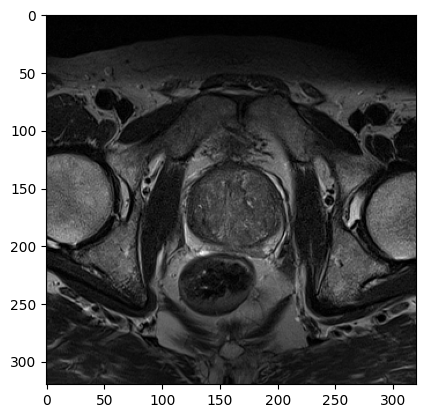

In [8]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load the image
image = sitk.ReadImage(mhd_file_path)

# Convert the image to a NumPy array (for display)
image_array = sitk.GetArrayFromImage(image)

# Visualize the slice_index slice
plt.imshow(image_array[10], cmap='gray')
plt.show()

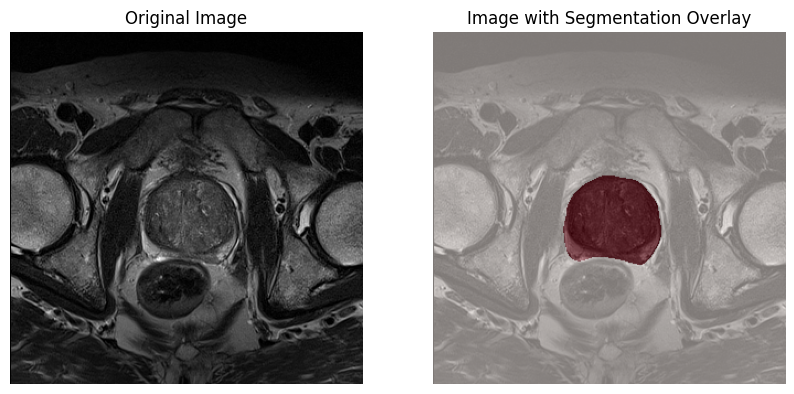

In [9]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

def visualize_image_with_segmentation(image_path, segmentation_path, slice_index=0):
    # Load the image and segmentation
    image = sitk.ReadImage(image_path)
    segmentation = sitk.ReadImage(segmentation_path)

    # Convert to NumPy arrays
    image_array = sitk.GetArrayFromImage(image)
    segmentation_array = sitk.GetArrayFromImage(segmentation)

    # Extract the slice
    image_slice = image_array[slice_index]
    segmentation_slice = segmentation_array[slice_index]

    # Overlay visualization
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_slice, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Segmentation overlay
    plt.subplot(1, 2, 2)
    plt.imshow(image_slice, cmap='gray')
    plt.imshow(segmentation_slice, alpha=0.5, cmap='Reds')  # Overlay in red
    plt.title("Image with Segmentation Overlay")
    plt.axis('off')

    plt.show()

# Example usage
visualize_image_with_segmentation(image_path, segmentation_path, slice_index=slice_index)


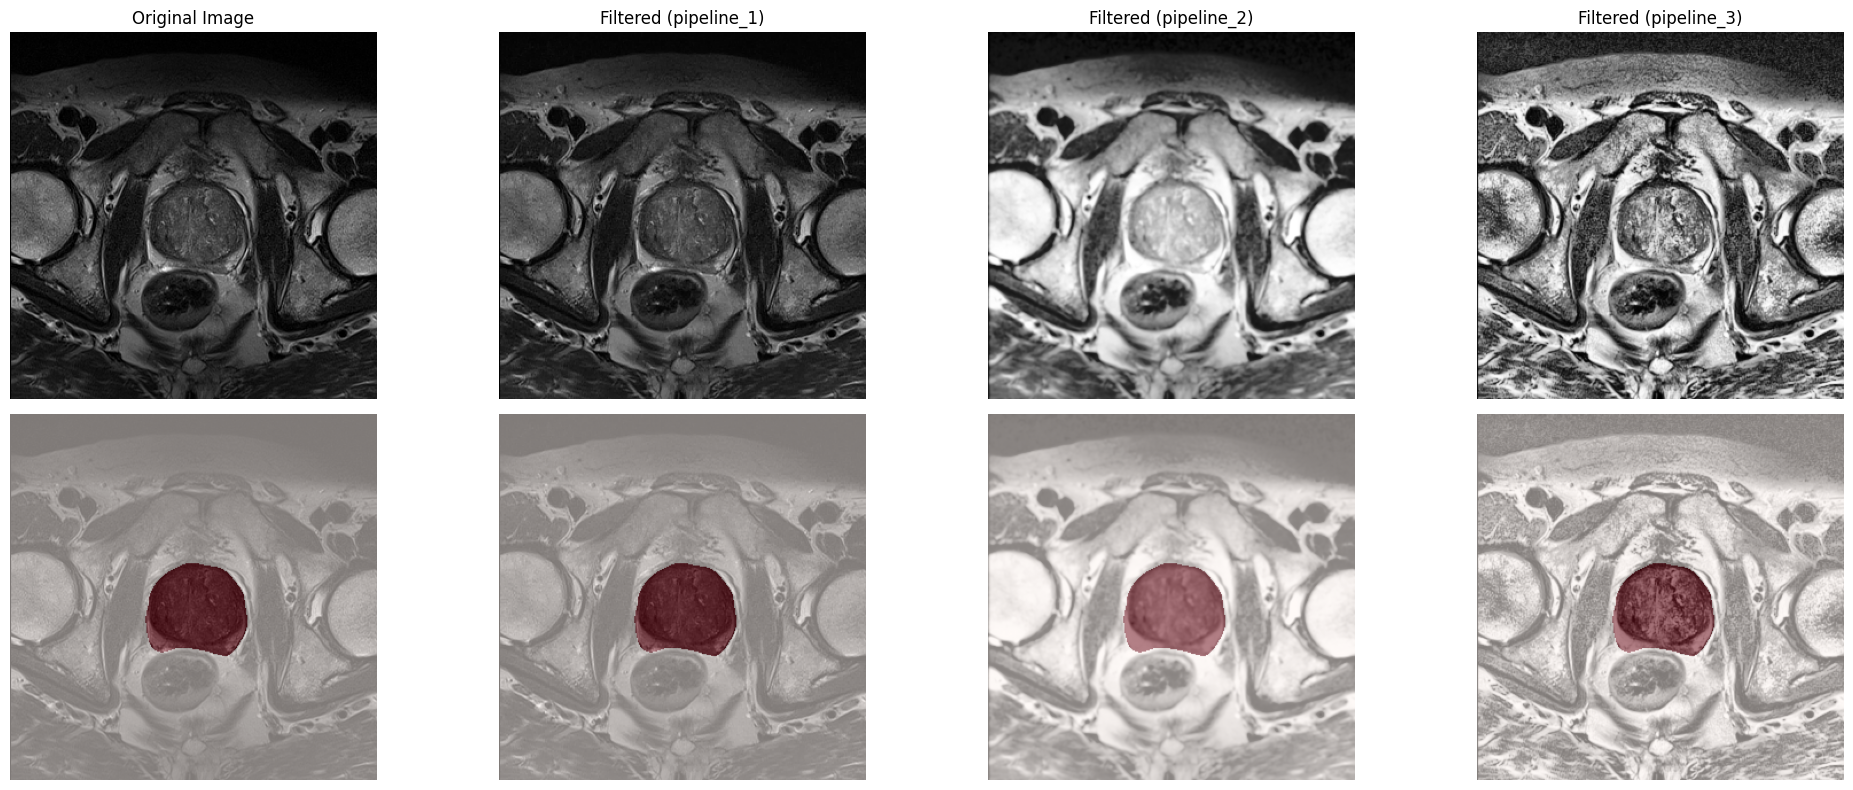

In [10]:
import matplotlib.pyplot as plt
from filters import apply_filter_pipeline
from data_loader import load_images_and_segmentations

def visualize_image_with_filters_and_segmentation(image_slice, segmentation_slice, pipelines):
    num_pipelines = len(pipelines)
    num_cols = num_pipelines + 1  # One column for the original, rest for pipelines

    # Set up the figure
    fig, axes = plt.subplots(2, num_cols, figsize=(20, 8))

    # Adjust spacing between rows
    plt.subplots_adjust(hspace=0, wspace=0.2)

    # Original image (first column of both rows)
    axes[0, 0].imshow(image_slice, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')

    axes[1, 0].imshow(image_slice, cmap='gray')
    axes[1, 0].imshow(segmentation_slice, alpha=0.5, cmap='Reds')
    axes[1, 0].axis('off')  # No title for the second row

    # Plot each pipeline result
    for i, pipeline in enumerate(pipelines):
        filtered_image = apply_filter_pipeline(image_slice, pipeline=pipeline)

        # First row: filtered image
        axes[0, i + 1].imshow(filtered_image, cmap='gray')
        axes[0, i + 1].set_title(f"Filtered ({pipeline})")
        axes[0, i + 1].axis('off')

        # Second row: filtered image with segmentation overlay
        axes[1, i + 1].imshow(filtered_image, cmap='gray')
        axes[1, i + 1].imshow(segmentation_slice, alpha=0.5, cmap='Reds')
        axes[1, i + 1].axis('off')  # No title for the second row

    plt.tight_layout()  # Further optimize spacing
    plt.show()

# Example usage
image_slice, segmentation_slice = load_images_and_segmentations(image_path, segmentation_path, slice_index)
pipelines = [f"pipeline_{n+1}" for n in range(3)]
visualize_image_with_filters_and_segmentation(image_slice, segmentation_slice, pipelines)


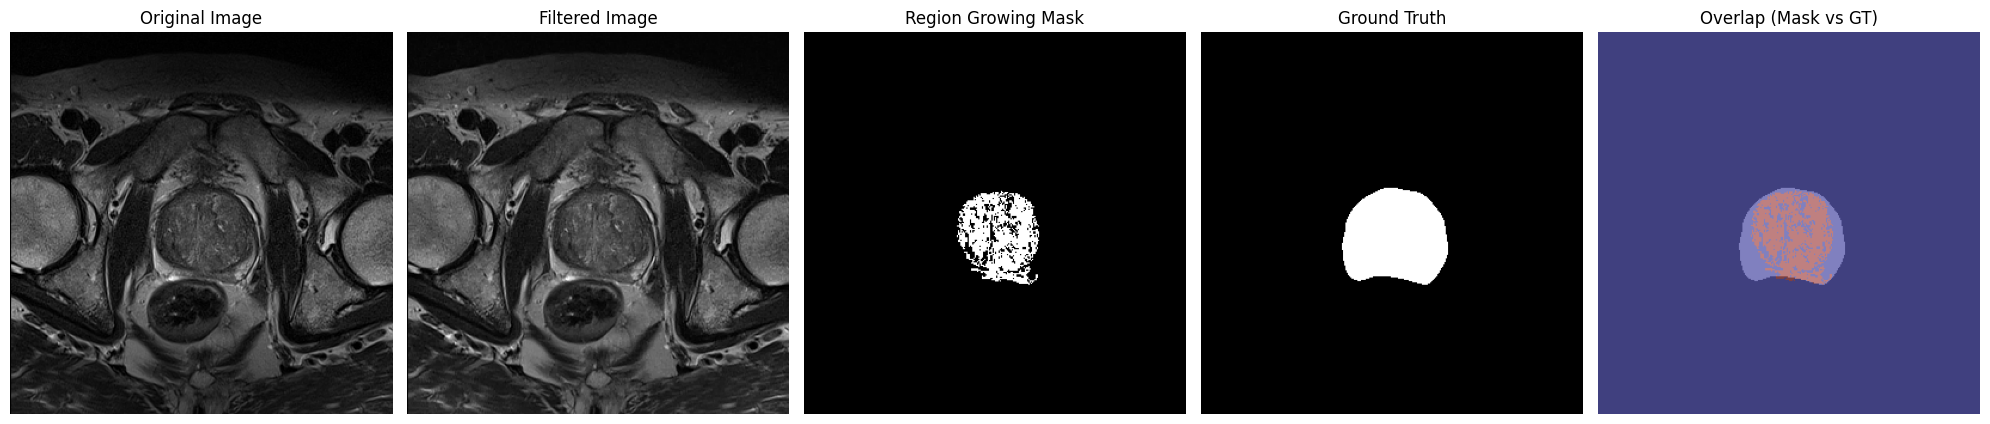

In [15]:
from region_growing import inspect_algorithm
a = inspect_algorithm(mhd_file_path, mhd_file_path[:-4] +"_segmentation.mhd", slice_index=10, pipeline='pipeline_1', threshold=0.486, save_figures=True)